In [103]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Value Index

time_idx = 0
x_idx = 1
y_idx = 2

# Default initial values

vx_0 = 0.707106781187
vy_0 = 0.658106781187

# Uncomment below in .py file to read input from command line
'''
if len(sys.argv) > 1 and (float(sys.argv[1]) != vx_0 or float(sys.argv[2]) != vy_0):
    vx_0 = float(sys.argv[1])
    vy_0 = float(sys.argv[2])
'''

# Store data from the csv file

data = []

file = open('projectiles.csv', 'r')

for line in file:
    row = line.split(' , ')
    data.append([int(row[time_idx]), float(row[x_idx]), float(row[y_idx])])

file.close()
#print(data)

In [126]:
# Establish X (input, (vx*t, vy*t, t^2, t, 1))

X = []

t = 1 # time
count = -1 # No. of ith trajectory
initial_vx = -1
initial_vx = -1
for point in data:
    if point[time_idx] == 1:
        initial_vx = point[x_idx]
        initial_vy = point[y_idx]
        vx_t = initial_vx
        vy_t = initial_vy
        X.append([vx_t, vy_t, t**2, t, 1])
        t += 1
    elif point[time_idx] > 1:
        vx_t = initial_vx * t
        vy_t = initial_vy * t
        X.append([vx_t, vy_t, t**2, t, 1])
        t += 1
    elif point[time_idx] == 0:
        count += 1
        t = 1
        initial_vx = -1
        initial_vx = -1
#print(np.array(X))
#print(np.array(X).shape)

In [127]:
# Establish Y (output, point (x,y))

Y = []

for point in data:
    if point[time_idx] > 0:
        Y.append([point[x_idx], point[y_idx]])
#print(np.array(Y))

In [128]:
# Calculate the least sqare solution B

B = np.linalg.lstsq(np.array(X), np.array(Y), rcond=None)[0]
#print(B)

In [124]:
# Initialize the problem

input_X = []
for i in range(50): # Simulate 50 * 10 ms
    vx_t = vx_0 * i
    vy_t = vy_0 * i
    input_X.append([vx_t, vy_t, i**2, i, 1])
#print(input_X)

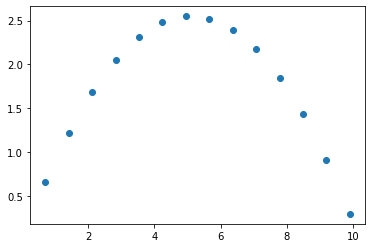

In [138]:
# Show results

retval = np.dot(input_X, B)
xy_split = retval.T

result = [[0., 0.]]
pos = 0
for y in xy_split[1]:
    if y > 0:         # Choose points above x axis
        result.append([xy_split[0][pos], y])
    pos += 1
result = np.array(result)
result_len = len(result)

output = open('result.csv', 'w')
for i in range(result_len):
    output.write(str(i) + ' , '+ str(result[i][0])+ ' , ' + str(result[i][1]) + '\n')
output.close()
    
plt.scatter(result.T[0], result.T[1]) # result.T seperates x and y in two sub-array
plt.show()

In [ ]:
# Refer to the necessary knowledge about numpy.linalg.lstsq at 
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq